In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simple_mc_funcs import*
from likelihoods import L_exp,L_LIV
import math

Color blind friendly colors.

In [2]:
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00','olive']

Generating random uniform distributions of different gamma-ray event sizes. 

In [3]:
size_of_sample=10
number_of_MC=10
uniforms = []
counter=0
while counter<number_of_MC:
    uniforms.append(np.random.uniform(0,1,size_of_sample))
    counter+=1

Generating power-laws and exponentially decaying distributions.

In [4]:
gamma=2.4
E_max=40
pow_dists = []
exp_dists = []
for dists in uniforms:
    powlawdist = pow_dists.append(powlaw_inversecdf(dists,
                                                    E_0=10.,
                                                    gamma=gamma,
                                                    E_max=E_max))
    exp_dists.append(exp_inversecdf(dists))

Number density of CsI.

In [5]:
n_CsI=1.05e22

Empty arrays to store sampled mean-free paths from distributions.

In [6]:
lambda_measured = []
for i in pow_dists:
    lambda_measured.append(np.zeros(len(i)))

Sampling a traversed path for every energy using a large sized traversed path sample.

In [7]:
u = np.random.uniform(0,1,1000000)
path_samples = exp_inversecdf(u)

for E_dist,lambda_meas_dist in zip(pow_dists,lambda_measured):
    for i,energy in enumerate(E_dist):
        x = np.random.choice(path_samples)
        while x==0.:
            x = np.random.choice(path_samples)
        lambda_meas_dist[i] = x

Generating an array that contains different values of the cross section in cm $^2$.

In [12]:
cs=np.linspace(1e-23,12e-23,100)

Plotting the Lorentz invariant likelihood as a function of cross section.

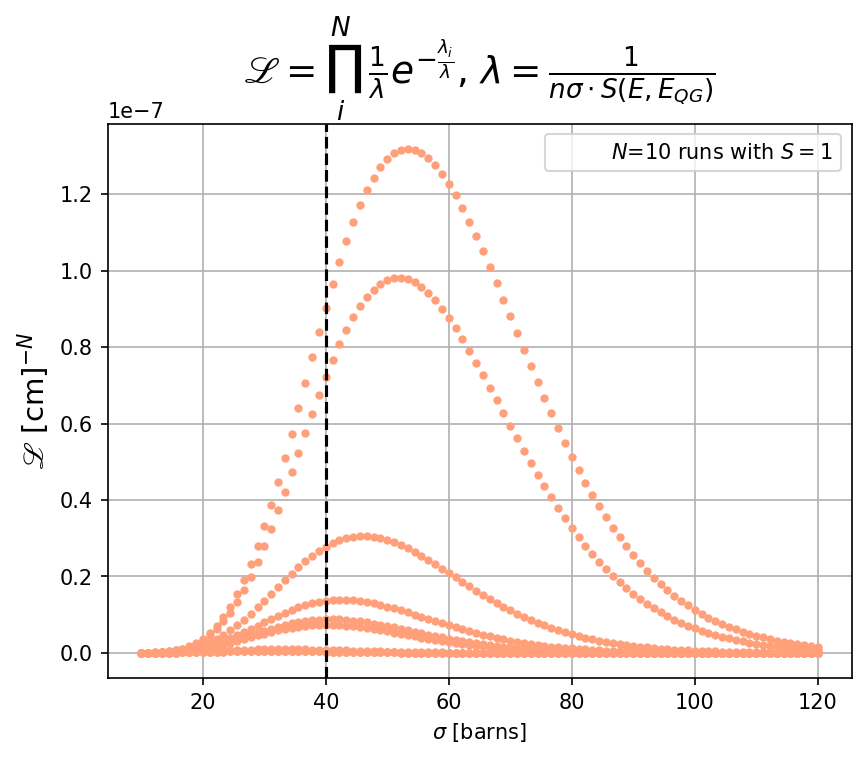

In [109]:
counter=1
plt.figure(dpi=150)
for x in lambda_measured:
    plt.plot(cs*1e24,L_exp(x,cs=cs),marker='.',linestyle='None',color='lightsalmon')#,label='run number {}'.format(counter))
    counter+=1
plt.axvline(x=40,linestyle='--',color='black')
plt.plot(40,0,color='None',label=r'$N$=10 runs with $S=1$')
plt.xlabel(r'$\sigma$ [barns]')
plt.ylabel(r'$\mathscr{L}$ [cm]$^{-N}$',fontsize=14)
plt.title(r'$\mathscr{L}=\prod^{N}_{i} \ \frac{1}{\lambda} e^{-\frac{\lambda_i}{\lambda}}$, $\lambda=\frac{1}{n\sigma \cdot S(E,E_{QG})}$',fontsize=18)
plt.grid()
plt.legend()
# plt.ylim(0,0.1e-7);

In [57]:
def SBfactor(E, n=-1, E_LIV=1.22e16):

    m_e = 511e-9 # TeV
    if type(E_LIV)!=float:
        if len(E_LIV)>1:
            E_LIV=E_LIV[:,np.newaxis]
            E=np.broadcast_to(E,(len(E_LIV),len(E)))
            factor = 1+n*(E**3)/(4*E_LIV*m_e**2)
            return 1/factor
        
    factor = 1+n*(E**3)/(4*E_LIV*m_e**2)
    return 1/factor


def LLIV(x,E,E_LIV=1.22e16,cs=4.0e-23,n=1.045e22,n_LIV=-1):

    x=x[x!=0]
    E=E[x!=0]
    LIV_factor=SBfactor(E=E,n=n_LIV,E_LIV=E_LIV)

    # If varying cs or E_LIV, using array broadcasting
    if type(cs)!=float:
        if len(cs)>1:
            cs=cs[:,np.newaxis]
            x=np.broadcast_to(x,(len(cs),len(x)))
            Lambda=1/(n*cs*LIV_factor) # Mean free path LIV included
            likelihood=np.prod(np.exp(-x/Lambda)/Lambda,axis=1)
            return likelihood

    elif type(E_LIV)!=float:
        if len(E_LIV)>1:
            E_LIV=E_LIV[:,np.newaxis]
            x=np.broadcast_to(x,(len(E_LIV),len(x)))
            Lambda=1/(n*cs*LIV_factor) # Mean free path LIV included
            likelihood=np.prod(np.exp(-x/Lambda)/Lambda,axis=1)
            return likelihood

    Lambda=1/(n*cs*LIV_factor) # Mean free path LIV included
    likelihood=np.prod(np.exp(-x/Lambda)/Lambda)

    return likelihood

Plotting the Lorentz violating likelihood as a function of cross section. 

/tmp/ipykernel_3349481/2380995659.py:27: RuntimeWarning: overflow encountered in exp
  likelihood=np.prod(np.exp(-x/Lambda)/Lambda,axis=1)


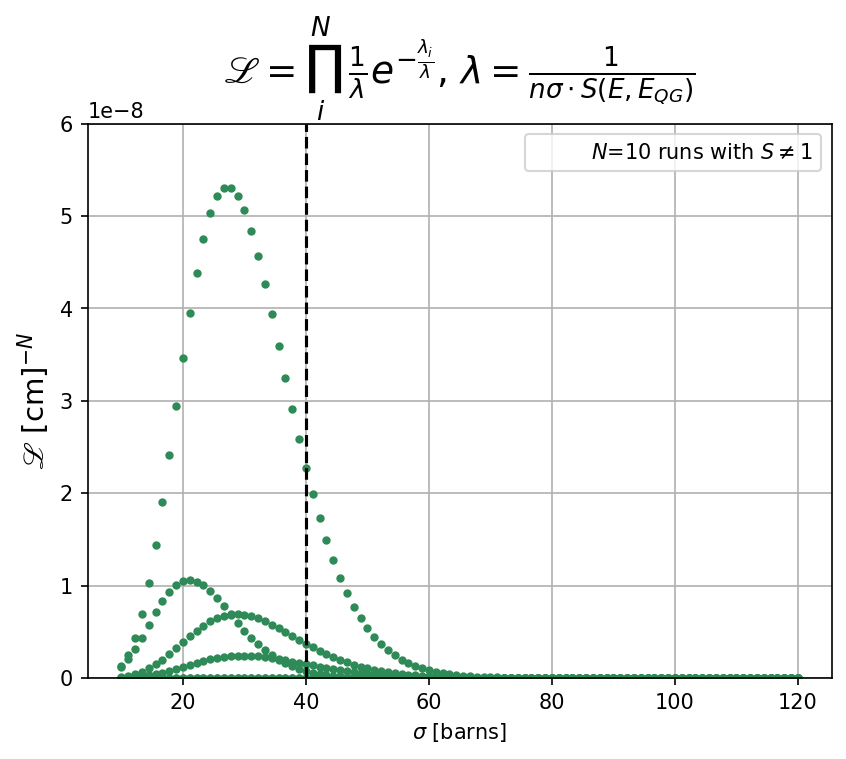

In [111]:
counter=1
plt.figure(dpi=150)
for x,E in zip(lambda_measured,pow_dists):
    plt.plot(cs*1e24,LLIV(x,E,cs=cs),marker='.',linestyle='None',color='seagreen')#,label='run number {}'.format(counter))
    counter+=1
plt.axvline(x=40,linestyle='--',color='black')
plt.plot(40,0,color='None',label=r'$N$=10 runs with $S\neq 1$')
plt.xlabel(r'$\sigma$ [barns]')
plt.ylabel(r'$\mathscr{L}$ [cm]$^{-N}$',fontsize=14)
plt.title(r'$\mathscr{L}=\prod^{N}_{i} \ \frac{1}{\lambda} e^{-\frac{\lambda_i}{\lambda}}$, $\lambda=\frac{1}{n\sigma \cdot S(E,E_{QG})}$',fontsize=18)
plt.grid()
plt.legend()
plt.ylim(0,0.00000006);

Plotting both the Lorentz invariant and violating likelihoods as a function of cross section.

/tmp/ipykernel_3349481/2380995659.py:27: RuntimeWarning: overflow encountered in exp
  likelihood=np.prod(np.exp(-x/Lambda)/Lambda,axis=1)


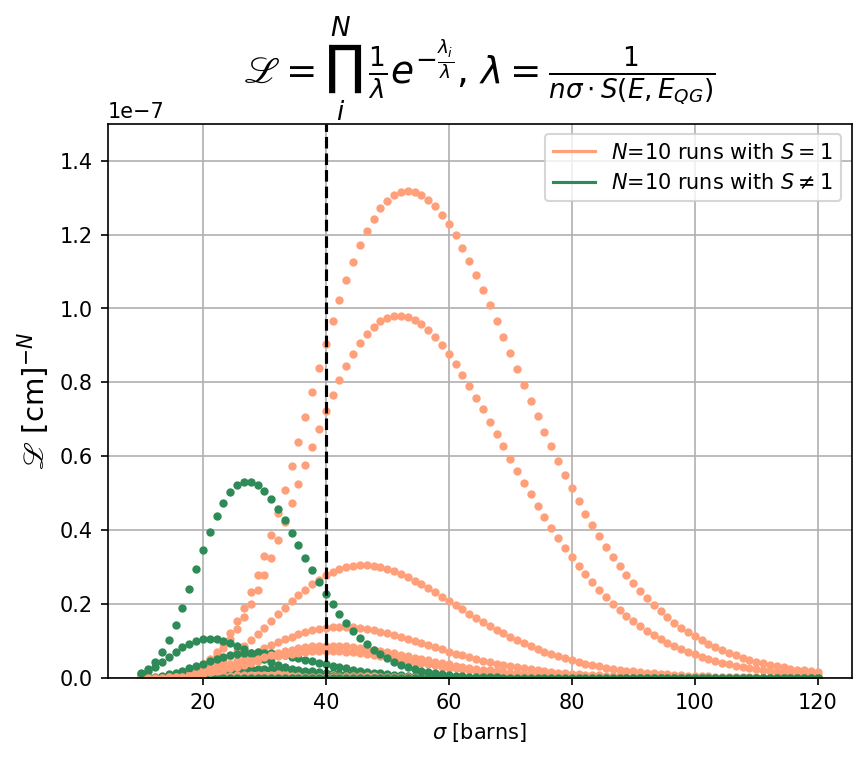

In [93]:
counter=1
plt.figure(dpi=150)
for x,E in zip(lambda_measured,pow_dists):
    plt.plot(cs*1e24,L_exp(x,cs=cs),marker='.',linestyle='None',color='lightsalmon')#,label='run number {}'.format(counter))
    plt.plot(cs*1e24,LLIV(x,E,cs=cs),marker='.',linestyle='None',color='seagreen')#,label='run number {}'.format(counter))
    counter+=1
plt.axvline(x=40,linestyle='--',color='black')
plt.plot(40,0,marker=None,color='lightsalmon',label=r'$N$=10 runs with $S=1$')
plt.plot(40,0,marker=None,color='seagreen',label=r'$N$=10 runs with $S\neq 1$')
plt.xlabel(r'$\sigma$ [barns]')
plt.ylabel(r'$\mathscr{L}$ [cm]$^{-N}$',fontsize=14)
plt.title(r'$\mathscr{L}=\prod^{N}_{i} \ \frac{1}{\lambda} e^{-\frac{\lambda_i}{\lambda}}$, $\lambda=\frac{1}{n\sigma \cdot S(E,E_{QG})}$',fontsize=18)
plt.grid()
plt.legend()

plt.ylim(0,0.00000015);

Plotting both the Lorentz violating likelihood as a function of $E_{LIV}$.

/tmp/ipykernel_3349481/2380995659.py:35: RuntimeWarning: overflow encountered in exp
  likelihood=np.prod(np.exp(-x/Lambda)/Lambda,axis=1)


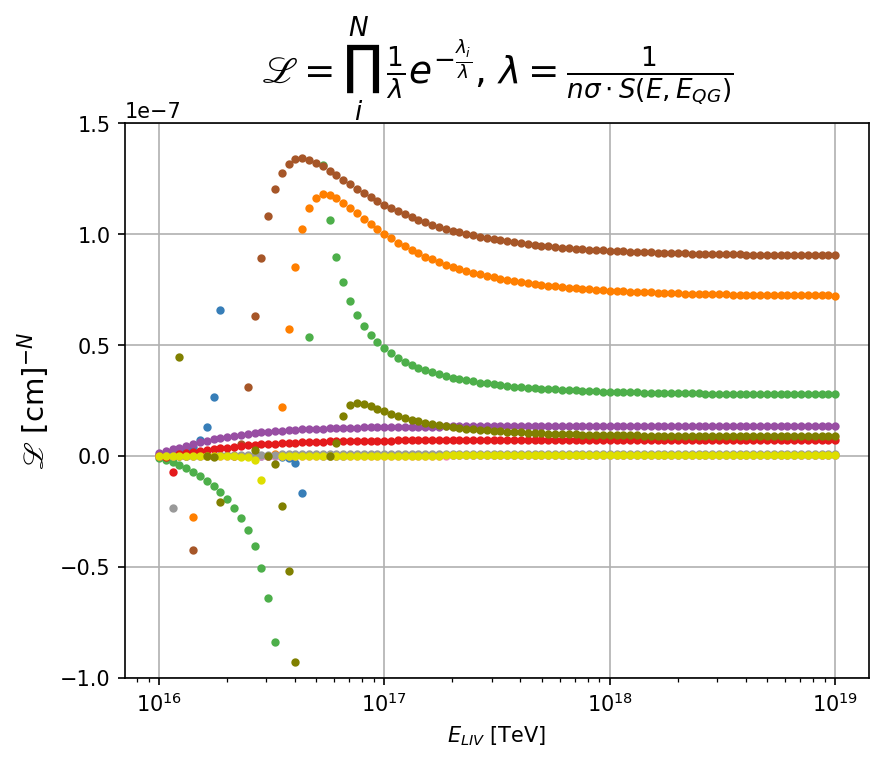

In [137]:
E_QG=np.logspace(16,19,100)
counter=1
plt.figure(dpi=150)
for x,E in zip(lambda_measured,pow_dists):
    plt.plot(E_QG,LLIV(x,E,E_LIV=E_QG),marker='.',linestyle='None',color=colors[counter-1])#,label='run number {}'.format(counter))
    counter+=1
plt.xlabel(r'$E_{LIV}$ [TeV]')
plt.ylabel(r'$\mathscr{L}$ [cm]$^{-N}$',fontsize=14)
plt.title(r'$\mathscr{L}=\prod^{N}_{i} \ \frac{1}{\lambda} e^{-\frac{\lambda_i}{\lambda}}$, $\lambda=\frac{1}{n\sigma \cdot S(E,E_{QG})}$',fontsize=18)
plt.grid()  
plt.xscale('log')
# plt.yscale('log')
plt.ylim(-0.0000001,0.00000015);